# Assignment 2


---

This assignment is due on Feb 15th, 2020. The goal of this assignment is to use statistics to answer the important question that any technical trading strategy can yield a better return that a simple "Buy-and-Hold" strategy. Next, 


There are four technical strategies implemented in this assignement, namely, buy-and-hold, moving average crossing, Bollinger band and relative signal strength indicator. 


1.   In Buy-and-hold strategy, a trader simply buys on the first trading day and keep holding the shares. 
2.   In the moving average crossing, a trader uses 10 and 25 historical averages to create the buy and sell signals. A trader will buy if 10-days moving average is more than 25-day moving average, and sell if 10-days moving average is less than or equal to 25-day moving average
3. In Bollinger band, a trader will compute 10-day moving mean and standard deviation. If the close price is higher than the mean + standard divation, a trader will buy. Howevwer, if the close price is lower than the mean - standard deviation, a trader will sell.
4. the relative strength indicator (RSI) measures the amount of buy and sell volumes to find out whether there are the over-bought or over-sold in the market. A trader will sell a stock if the RSI is more than 70 and sell a stock if RSI is less than 40. 
The Python code for each strategies is given below.


In [1]:
import csv 
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def buyAndHold(data_frame, is_plot=False):
  """
  Buy and Hold strategy:
  Inputs: 
          data_frame: pandas dataframe of the stock prices. It must have the "Adj Close" prices
          is_plot: If true, this code will plot the Adj close price and show the buy and sell points.
  output:
          signal indicator: the series of indicators 1 to take the position, 0 for keep previous status and -1 to clear the position.

  """

  close = data_frame['Adj Close']
  status = 0
  signal = []
  for k in range(close.shape[0]):
    if k == 0:
      signal.append(1)
    else:
      signal.append(0)
  signal = pd.Series(data=signal, index=data_frame.index)
  buy_sig = close[signal == 1]
  sell_sig = close[signal == -1]
  if is_plot:
    plt.figure(figsize=(15,10))
    plt.plot(close)    
    plt.plot(buy_sig, color="red", marker="^",linestyle="")   
    plt.plot(sell_sig, color="black", marker="v",linestyle="")  
    plt.legend(["Adj Close","Buy", "Sell"])
    plt.title("Buy and Hold")
    plt.grid()
  return signal


In [3]:
def movingavg(data_frame, is_plot=False):
  """
  Moving Average crossing strategy:
  Inputs: 
          data_frame: pandas dataframe of the stock prices. It must have the "Adj Close" prices
          is_plot: If true, this code will plot the Adj close price and show the buy and sell points.
  output:
          signal indicator: the series of indicators 1 to take the position, 0 for keep previous status and -1 to clear the position.

  """
  long_win = 25
  short_win = 10
  close = data_frame['Adj Close'] 
  mu_long = close.rolling(long_win).mean()
  mu_short = close.rolling(short_win).mean()
  signal = []
  status = 0
  for k in range(close.shape[0]):
    if ( mu_short[k] > mu_long[k]) and (status ==0):
      signal.append(1)
      status = 1
    elif (mu_short[k] < mu_long[k]) and (status ==1):
      signal.append(-1)
      status = 0
    else:
      signal.append(0)

  signal = pd.Series(data=signal, index=data_frame.index)
  buy_sig = close[signal == 1]
  sell_sig = close[signal == -1]
  if is_plot:
    plt.figure(figsize=(15,10))
    plt.plot(close)    
    plt.plot(mu_long)
    plt.plot(mu_short)
    plt.plot(buy_sig, color="red", marker="^",linestyle="")   
    plt.plot(sell_sig, color="black", marker="v",linestyle="")  
    plt.legend(["Adj Close",f"MA({long_win})", f"MA({short_win})", "Buy", "Sell"])
    plt.title("Moving Average Crossing")
    plt.grid()
  return signal


In [4]:
def bollinger(data_frame, is_plot=False):
  """
  Bollinger Band strategy:
  Inputs: 
          data_frame: pandas dataframe of the stock prices. It must have the "Adj Close" prices
          is_plot: If true, this code will plot the Adj close price and show the buy and sell points.
  output:
          signal indicator: the series of indicators 1 to take the position, 0 for keep previous status and -1 to clear the position.

  """
  close = data_frame['Adj Close']
  win = 10 
  ma = close.rolling(win).mean()
  std = close.rolling(win).std()
  up = ma + std
  low = ma - std  
  status = 0
  signal = []
  for k in range(close.shape[0]):
    closek = close[k]
    if (closek >  up[k]) and (status == 0): # buy
      signal.append(1)
      status = 1
    elif (closek < low[k]) and (status == 1): # sell
      signal.append(-1)
      status = 0
    else:
      signal.append(0)

  signal = pd.Series(data=signal, index=data_frame.index)
  buy_sig = close[signal == 1]
  sell_sig = close[signal == -1]
  if is_plot:
    plt.figure(figsize=(15,10))
    plt.plot(close)
    plt.plot(up)
    plt.plot(low) 
    plt.plot(buy_sig, color="red", marker="^",linestyle="")   
    plt.plot(sell_sig, color="black", marker="v",linestyle="")  
    plt.legend(["Adj Close","High", "Low", "Buy", "Sell"])
    plt.title("Bollinger Bands")
    plt.grid()
  return signal


In [5]:
def rsi(data_frame, is_plot=False):
  """
  Relative Signal Strength:
  Inputs: 
          data_frame: pandas dataframe of the stock prices. It must have the "Adj Close" prices
          is_plot: If true, this code will plot the Adj close price and show the buy and sell points.
  output:
          signal indicator: the series of indicators 1 to take the position, 0 for keep previous status and -1 to clear the position.

  """
  window_length= 14
  upv = 70
  lowv= 40
  close = data_frame['Adj Close']
  delta = close.diff(1) 
 
  up, down = delta.copy(), delta.copy()
  up[up < 0] = 0
  down[down > 0] = 0
  roll_up1 = up.ewm(span=window_length).mean()
  roll_down1 = down.abs().ewm(span=window_length).mean()
  # Calculate the RSI based on EWMA
  RS1 = roll_up1 / roll_down1
  RSI1 = 100.0 - (100.0 / (1.0 + RS1))
  status = 0
  signal = []
  for k in range(close.shape[0]):
    rsk = RSI1[k]
    if (rsk < lowv) and (status == 0): # buy
      signal.append(1)
      status = 1
    elif (rsk > upv) and (status == 1): # sell
      signal.append(-1)
      status = 0
    else:
      signal.append(0)

  signal = pd.Series(data=signal, index=data_frame.index)
  buy_sig = close[signal == 1]
  sell_sig = close[signal == -1]

  if is_plot:  
    plt.figure(figsize=(15,10))
    plt.subplot(2,1,1)
    plt.plot(close)
    plt.plot(buy_sig, color="red", marker="^",linestyle="")   
    plt.plot(sell_sig, color="black", marker="v",linestyle="")  
    plt.legend(["Adj Close","Buy", "Sell"])
    plt.grid()
    plt.title("RSI")
    plt.subplot(2,1,2)
    plt.plot(RSI1)
    plt.plot(RSI1.index, upv*np.ones((close.shape[0],)),"b--")
    plt.plot(RSI1.index, lowv*np.ones((close.shape[0],)),"b--")
    plt.legend(['RSI', "SELL Band", "BUY Band"])
    plt.grid()
    plt.title("RSI Value")
  return signal


I have created a code to use the idicator to trade the stock.

In [6]:
def techicalTrading(stock_info, # dataframe of a stock
                    indicator, # trade indicator
                    initial_money=1000000 #Starting money
                    ):
  """
  Trader simulation:
  Inputs: 
        stock_info: stock price data frames
        indicator: time-series indicator: 1 for Buy, -1 for sell, 0 for nothing
        initinal_money: initial money in the port. default 1M 
  output:
        wealth: time-series money in the port
  """

  num_dates, _ = stock_info.shape
  status = "NONE" # Start with no poistion
  stock= 0
  money = initial_money
  wealth = []
  close = stock_info['Adj Close']
  for k in range(num_dates):
    indicatork = indicator[k]
    if not np.isnan(indicatork): # if it is not NA
      if (indicatork > 0) and ( status == "NONE"):
        stock = money/close.values[k]
        #print(f"Buy at {close.values[k]}")
        money = 0
        status = "HOLD"
      elif (indicatork < 0) and ( status == "HOLD"):
        money = stock * close.values[k]
        stock =  0
        #print(f"Sell at {close.values[k]}")
        status = "NONE"
    cur_wealth = money + stock * close.values[k]
    wealth.append(cur_wealth)
  wealth = pd.Series(data=wealth, index=stock_info.index)  
  return wealth 



<Figure size 1080x1080 with 0 Axes>

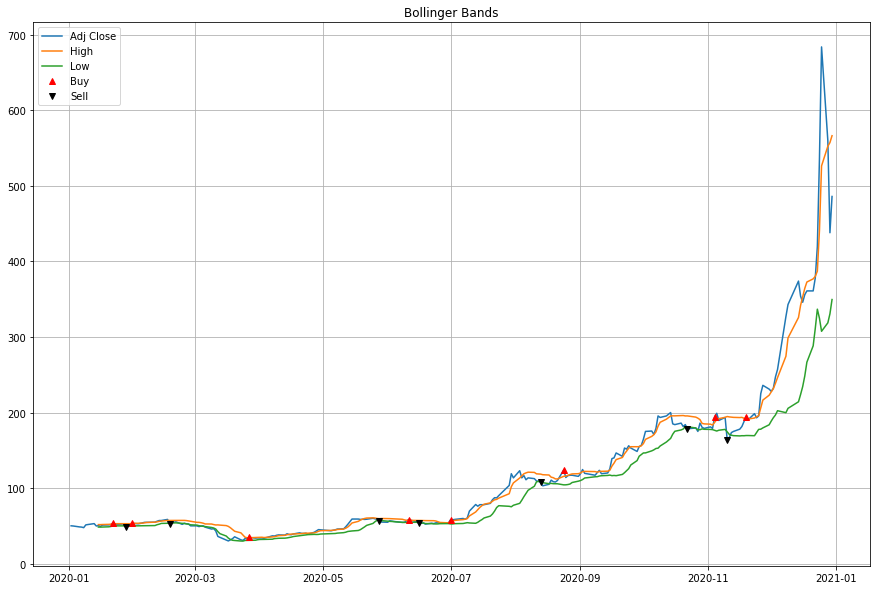

In [7]:
# Example
df = data.DataReader("DELTA.BK", "yahoo", "2020-01-01", "2020-12-31") 
plt.figure(figsize=(15,15))
indicator = bollinger(df, is_plot=True)

Final Wealth is 7,524,137.139388054
Total again in 2 years in 652.41 %


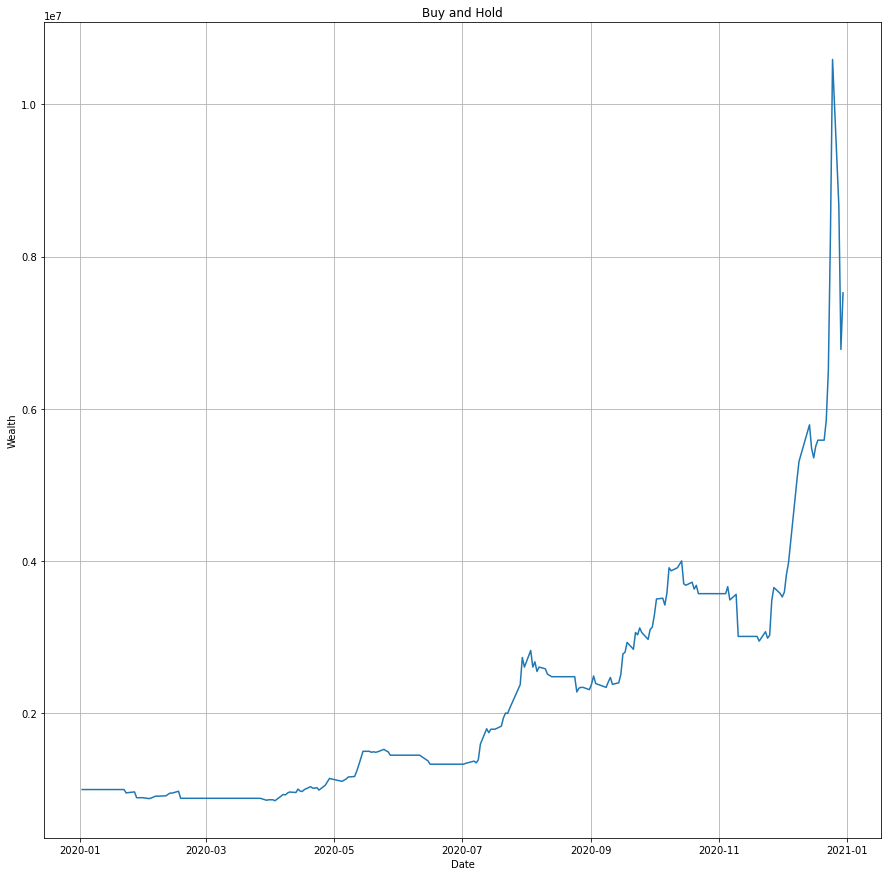

In [8]:
# Example
plt.figure(figsize=(15,15))
wealth = techicalTrading(df, indicator, initial_money=1000000)
plt.plot(wealth)
plt.xlabel("Date")
plt.ylabel("Wealth")
plt.title("Buy and Hold")
plt.grid()
print(f"Final Wealth is {wealth[-1]:,}")
print(f"Total again in 2 years in {(wealth[-1]/wealth[0]-1)*100:3.2f} %")

Question 1: Use dataset of SET50 list in 2020 (https://www.set.or.th/th/market/files/constituents/SET50_100_H2_2020_revised.pdf) Compute the return in 2020 from 2020-01-01 to 2020-12-31. Find out
1. Average annual return _________ and annual STD ______________ for buy and hold
2. Average annual return _________ and annual STD ______________ for moving average crossing
3. Average annual return _________ and annual STD ______________ for Bollinger Band
4. Average annual return _________ and annual STD ______________ for RSI

In [15]:
# Add your code here
import csv
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as reader
set50_file = "/content/drive/MyDrive/set50.txt"
data_frames = dict()
stocks = []
wealths = {buyAndHold:[], movingavg: [], bollinger: [], rsi: []}
methods = [buyAndHold, movingavg, bollinger, rsi]
with open(set50_file) as csv_file:
   csv_reader = csv.reader(csv_file, delimiter=',')
   for row in csv_reader:     
     stock = row[0]
     print(f"Working with {stock}")
     data_frames[stock] = reader.DataReader(f"{stock}.BK", "yahoo","2020-01-01","2020-12-31") 
     for method in methods:     
       indicator = method(data_frames[stock] , is_plot=False)
       wealth = techicalTrading(data_frames[stock], indicator, initial_money=1000000)
       wealths[method].append(wealth[-1]) #last wealth 

Working with ADVANC
Working with AOT
Working with AWC
Working with BBL
Working with BDMS
Working with BEM
Working with BGRIM
Working with BH
Working with BJC
Working with BPP
Working with BTS
Working with CBG
Working with CPALL
Working with CPF
Working with CPN
Working with CRC
Working with DTAC
Working with EA
Working with EGCO
Working with GLOBAL
Working with GPSC
Working with GULF
Working with HMPRO
Working with INTUCH
Working with IRPC
Working with IVL
Working with KBANK
Working with KTB
Working with KTC
Working with LH
Working with MINT
Working with MTC
Working with OSP
Working with PTT
Working with PTTEP
Working with PTTGC
Working with RATCH
Working with SAWAD
Working with SCB
Working with SCC
Working with SCGP
Working with TISCO
Working with TMB
Working with TOA
Working with TOP
Working with TRUE
Working with TTW
Working with TU
Working with VGI
Working with WHA


In [20]:
init_wealth = 1000000
retn = dict()
for method in methods:
  wealth = np.array(wealths[method])
  ret = wealth / init_wealth -1.0
  print(method, f": {np.mean(ret)} and {np.std(ret)}")
  retn[method] = ret 

<function buyAndHold at 0x7fdf7ab5ed90> : -0.12210978428954794 and 0.19916826810044988
<function movingavg at 0x7fdf7ab4c8c8> : 0.10309998251178375 and 0.2851840763899233
<function bollinger at 0x7fdf7c552d90> : 0.15167999381867334 and 0.31128699126639864
<function rsi at 0x7fdf7ab5eea0> : -0.16509239772300277 and 0.18396417544010213


Question 2: Compute 95% confidence interval of the average annual return for each strategies.
1. Specify the type of statistics used in computing the confidence interval  ___________ (z-statistics or t-statistics)
2. 95% Confidence interval for Buy and hold is _____________________________.
3. 95% Confidence interval for moving average crossing is _____________________________.
4. 95% Confidence interval for Bollinger Band is _____________________________.
5. 95% Confidence interval for RSI is _____________________________.


In [22]:
# Add your code here
import scipy.stats as st 
for method in methods:
  ret = retn[method]
  lower, upper = st.t.interval(0.95, len(ret)-1, loc=np.mean(ret), scale=ret.std(ddof=1)/len(ret))
  print(method, f" 95%-Confidence: {lower} and {upper}")


<function buyAndHold at 0x7fdf7ab5ed90>  95%-Confidence: -0.13019592649445044 and -0.11402364208464544
<function movingavg at 0x7fdf7ab4c8c8>  95%-Confidence: 0.09152163713449878 and 0.11467832788906872
<function bollinger at 0x7fdf7c552d90>  95%-Confidence: 0.13904188182461388 and 0.1643181058127328
<function rsi at 0x7fdf7ab5eea0>  95%-Confidence: -0.172561260596611 and -0.15762353484939454


Question 3: Use the t-test to make the conclusion whether any of these strategies yield positive return.
1. Buy and Hold has t-score: _________________ and p-value ____________. Can it make profit? ___________ (yes or no). 
2. Moving average crossing has t-score: _________________ and p-value ____________. Can it make profit? ___________ (yes or no). 
3. Bollinger Band has t-score: _________________ and p-value ____________. Can it make profit? ___________ (yes or no). 
4. RSI has t-score: _________________ and p-value ____________. Can it make profit? ___________ (yes or no). 

In [28]:
# Add your code here
from scipy.stats import ttest_1samp
for method in methods:
  ret = retn[method]
  t_score, p_value = ttest_1samp(ret, popmean=0)
  if (p_value/2 < 0.05) and (t_score > 0):
    print(method, f" t-score: {t_score}, p-value: {p_value/2}, Yes. It can make a profit")
  elif (t_score < 0):
    print(method, f" t-score: {t_score}, p-value: {1- (p_value/2)}, No. It cannot make a profit")  
  else:
    print(method, f" t-score: {t_score}, p-value: {p_value/2}, No. It cannot make a profit")  

<function buyAndHold at 0x7fdf7ab5ed90>  t-score: -4.2916901280465805, p-value: 0.9999583403865957, No. It cannot make a profit
<function movingavg at 0x7fdf7ab4c8c8>  t-score: 2.530645773488869, p-value: 0.0073235828084758665, Yes. It can make a profit
<function bollinger at 0x7fdf7c552d90>  t-score: 3.410871596050931, p-value: 0.0006527631672147644, Yes. It can make a profit
<function rsi at 0x7fdf7ab5eea0>  t-score: -6.281912123903127, p-value: 0.9999999570385784, No. It cannot make a profit


Question 4: Next, we compare againts Buy-and-Hold startegy using t-score. Here,

H0 : A strategy is the same or worst than buy-and-hold

H1: A strategy is better than buy and hold:
1. Moving Average vs Buy and Hold: t-score_______ p-value ______. Is moving average better than buy and hold? _____ (yes or no)
2. Bolling Band vs Buy and Hold: t-score_______ p-value ______. Is moving average better than buy and hold? _____ (yes or no)
3. RSI vs Buy and Hold: t-score_______ p-value ______. Is moving average better than buy and hold? _____ (yes or no)


In [33]:
# Add your code here
from scipy.stats import ttest_ind
ret0 = retn[buyAndHold]
for method in methods[1:]:
  ret1 = retn[method]
  t_score, p_value = ttest_ind(ret1, ret0)
  if t_score > 0:
    if p_value/2.0 < 0.05:
      print( method, f" vs BuyAndHold: t-score: {t_score}, p-value: {p_value/2.0}. Yes, it is better than BuyAndHold")
    else:
      print( method, f" vs BuyAndHold: t-score: {t_score}, p-value: {p_value/2.0}. No, it is not better than BuyAndHold")
  else:
    print( method, f" vs BuyAndHold: t-score: {t_score}, p-value: {1.0 - p_value/2.0}. No, it is not better than BuyAndHold")




<function movingavg at 0x7fdf7ab4c8c8>  vs BuyAndHold: t-score: 4.532066180807941, p-value: 8.257772186494931e-06. Yes, it is better than BuyAndHold
<function bollinger at 0x7fdf7c552d90>  vs BuyAndHold: t-score: 5.1861066922119425, p-value: 5.784402915125568e-07. Yes, it is better than BuyAndHold
<function rsi at 0x7fdf7ab5eea0>  vs BuyAndHold: t-score: -1.1097246516033978, p-value: 0.8650833255508258. No, it is not better than BuyAndHold
